In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns


In [2]:
data= pd.read_csv("Mall_Customers.csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=data.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import OPTICS

In [7]:
clustering = OPTICS(min_samples=2).fit(x)
clustering.labels_

C:\Users\rsarv\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([ 0, -1, 35, 29,  0, 29, 35, 46, 35, -1, 34, 46, 34, 30, 34, 30,  1,
       -1, -1, 46,  1, 28, 36, 28, 33, 31,  2, -1,  2, 31, 36, 27, 36, 32,
       33, 31, 33, 27,  3, 27,  4, 32,  4, 13,  3, -1, -1, -1,  5,  5,  9,
       13,  9, 13,  6,  5, -1,  6,  8,  6, 10, 10,  8, 12,  8, 12,  8,  7,
       12,  7, 11, -1, -1, 11, 14, 16, 16, 14, 16, 15, 16, 16, 15, -1, 16,
       14, 18, 17, 18, -1, 17, -1, 21, -1, 23, -1, -1, 21, 23, 21, 23, 20,
       -1, 19, 19, 23, -1, 22, 23, 20, -1, 19, -1, 22, -1, -1, -1, 24, -1,
       24, 24, -1, 24, 51, -1, 48, 25, 51, 39, 48, 39, 48, 25, 47, 40, 51,
       40, 47, -1, 47, 40, 51, 26, 51, -1, 51, 26, 49, 37, 51, 38, 51, 37,
       50, 38, 51, 41, 50, 41, 49, 26, -1, -1, 51, 44, 54, 42, 52, 44, 54,
       42, 54, 42, 52, 42, -1, 42, 54, 42, 53, 45, 53, 42, 53, 45, -1, 43,
       55, 42, 53, 43, 55, 56, -1, 56, 57, -1, 57, -1, 57])

In [8]:
supervised =pd.DataFrame(data)

In [9]:

supervised['cluster_group']= clustering.labels_

In [10]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,35
3,4,Female,23,16,77,29
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,57
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,57
198,199,Male,32,137,18,-1


In [11]:
supervised.to_csv("cluster.csv",index=False)

C:\Users\rsarv\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\rsarv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


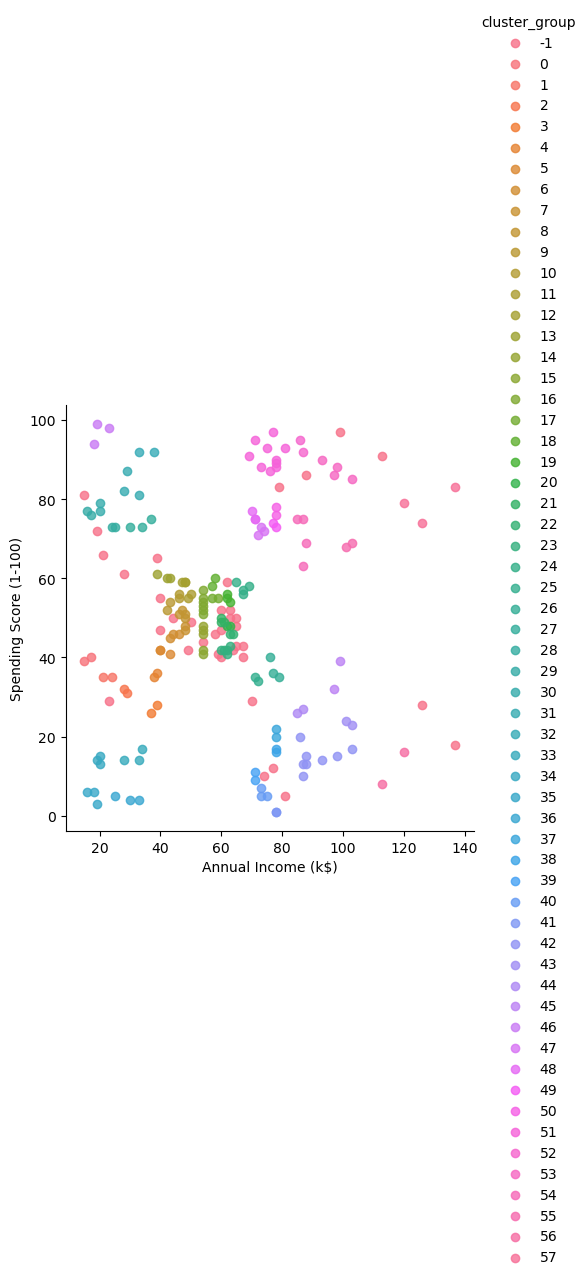

In [12]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)